In [62]:
## All imports
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from mpl_toolkits.mplot3d import Axes3D

In [13]:
#### Basics ####
a = np.arange(12).reshape(3,4)
print(a)

b = np.sqrt(a)
print(b)

c = np.random.randn(50)
print(c)
d = c + np.random.normal(50, 0.1, 50)
print(d)
e = np.corrcoef(c,d)
print(e)

np.random.seed(1)
f = np.random.randn(50)
print(f)
print("Mean : {}".format(np.mean(f)))
print("Variance : {}".format(np.var(f)))
print("Standard Deviation : {}".format(np.std(f)))


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[0.         1.         1.41421356 1.73205081]
 [2.         2.23606798 2.44948974 2.64575131]
 [2.82842712 3.         3.16227766 3.31662479]]
[ 0.52475049 -0.47712421 -0.03599018  1.03703898  0.67261975  2.42887697
  1.00568668  0.35356722  0.61472628 -0.34898419 -0.977773    0.17195713
  0.49056104 -1.39528303 -0.52235647 -0.3692559   0.2656424  -0.26046606
  0.44509671  0.09811225  1.06032751 -1.71116766  1.65712464  1.41767401
  0.05031709  0.65032321  0.6065484  -0.73728963  0.16466507  0.77817418
  0.30981676  1.05132077  0.09499611  0.08075099 -0.76780375 -0.36453805
 -0.45971768  1.70548352  0.24050555 -0.9994265   0.39859839 -0.1920037
 -3.05376438  0.47985237 -1.55269878  0.57846442 -0.9612636  -1.45832446
  0.49434165 -1.49419377]
[50.48008057 49.54331353 50.02523307 51.11152744 50.66899162 52.34563743
 51.19806822 50.29296908 50.79508517 49.60576331 49.13835557 50.27895369
 50.38600762 48.64024543 49.55318274 49.70084231 50.24574

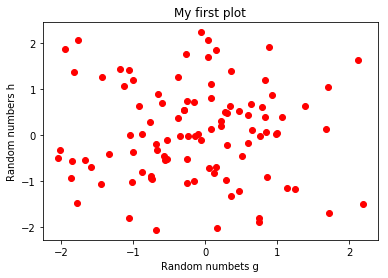

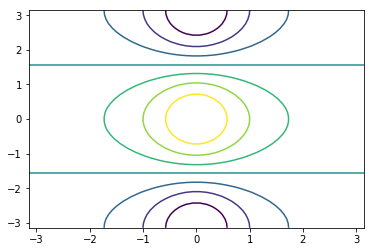

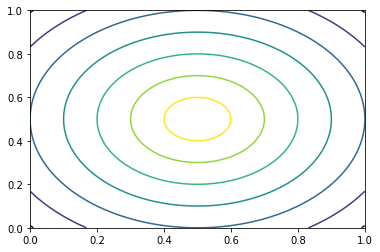

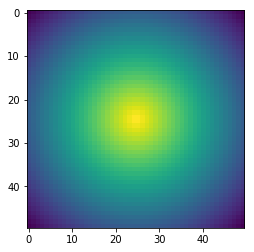

Text(0.5,0.8464,'surface plot')

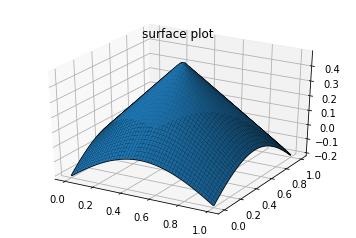

In [40]:
##### Garphics ######
g = np.random.randn(100)
h = np.random.randn(100)
plt.plot(g,h,'ro')
plt.ylabel('Random numbers h')
plt.xlabel('Random numbets g')
plt.title('My first plot')
plt.savefig('mypdf.pdf')
plt.savefig('mypng.png')
plt.show()


y = np.linspace(-np.pi, np.pi, 50)
x = y.copy()
X, Y = np.meshgrid(x,y)
Z = np.cos(Y)/(1+X**2)
plt.contour(X,Y,Z)
plt.show()


x = np.linspace(0,1,50)
y = x.copy()
X,Y = np.meshgrid(x,y)
slope = np.pi/4
R = 0.5 - np.sqrt((X-0.5)**2 + (Y-0.5)**2)
H = R*np.tan(slope)
plt.contour(X,Y,H)
plt.show()

plt.imshow(H)
plt.show()

Z = H
fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.contour3D(X,Y,Z)
#ax.view_init(10,35) #elevation and Azimuth angle

ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe')

ax.plot_surface(X, Y, Z)
ax.set_title('surface plot')

In [56]:
#### Indexing Data ####
A = np.arange(1,17).reshape(4,4)
print(A)
print(A[1,2])
print(A[[0,2], :])## Selecting particular elements
print(A[0:2, 2:4])

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
7
[[ 1  2  3  4]
 [ 9 10 11 12]]
[[3 4]
 [7 8]]


In [85]:
#### Reading data. Pandas
!pwd
path = '/storage/emulated/0/Download/Auto.csv'
df = pd.read_csv(path)
print(df.index)
print(df.shape)
print(df.isna().shape)

/storage/emulated/0
RangeIndex(start=0, stop=397, step=1)
(397, 9)
(397, 9)
